# Markov chain implementation

A Markov chain is a mathematical model that represents a sequence of events or "states", where the probability of transitioning from one state to another depends only on the current state and is independent of the past history of states. It is a memoryless stochastic process.

Below is a Markov chain with 3 states, the diagram shows the relationship between those states. This example shows a model of what the weather will be like on each day. Lets say that it rains on a given day, then this model tells us that for the next day there is a 30% chance of it raining again, a 20% chance of it being sunny and a 50% chance of it being cloudy. You can garner information about cloudy and sunny days as well by looking at the diagram.

We call the matrix on the right the transition matrix $P_{ij}$. This matrix holds all the information that the diagram does, but is unfortunately less visually appealing.

For the sake of my programming, we will be labelling the states numerically as: 1 - clouds, 2 - rain, 3 - sun.



In this notebook, I will show some basic features of this Markov chain and how it's random behaviour can become more predictable in the long term.

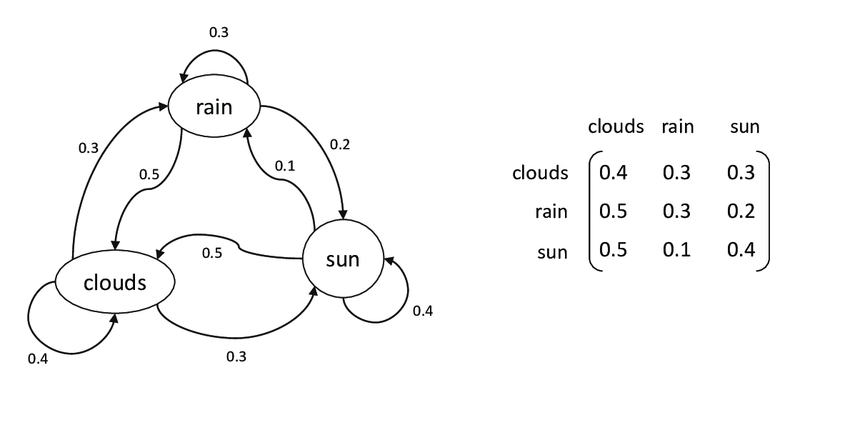

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import random

## A random walk

In maths, a random walk is consists of taking a number of steps through a random process. If you go long enough, you can sometimes see ordered behaviour emerge from the randomness. Hopefully, we'll be able to find some here. 

To transition between states in a computationally friendly way, we use linear algebra. We can do this because, as mentioned at the start, each state transition depends only on the previous one. Let's represent that in probability language:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}\mathbb{P}(x_{n+1} = j,  x_n = i)
$$

these events are mutually exclusive (only one of them can be happening at any one time) as in each step, the system holds one and only one state with a bit of conditional probability magic, this gives us:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}\mathbb{P}(x_{n+1} = j |  x_n = i)\mathbb{P}(x_n = i)
$$

which is just a linear equation. In addition, we have that the probability of going from i to j on any state is $P_{ij}$ so this gives us that:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}P_{ij}\mathbb{P}(x_n = i)
$$

Now if we denote $\mathbb{P}(x_n = i) = \rho_{i}^{(n)}$, then we have the equation:

$$\rho_{j}^{(n+1)} =   \sum_{i=0}^{2}P_{ij}\rho_{i}^{(n)}$$

which translates directly to linear algebra as:

$$(\rho^{(n+1)})^T =   (\rho^{(n)})^TP_{ij}$$

This is quite useful because:

1) We can code this easily

2) we get the following handy recurrence forumla for $(\rho^{(n)})^T$: 

$$(\rho^{(n)})^T =   (\rho^{(0)})^T (P_{ij})^n $$ 

We're gonna use this for our random walk:


In [38]:
def Random_walk(init_state, n):
    '''
    runs a random walk of n steps from
    an initial state in our markov chain
    described above.
    '''
    #set state = init_state
    i = init_state
    #define transition matrix
    Pij = np.array([[0.4,0.3,0.3], [0.5,0.3,0.2], [0.5,0.1,0.4]])
    Pn = matrix_power(Pij, n)
    #create cumsum of Pn for random number selection
    Pi_cum = np.cumsum(Pn[i])
    #select a uniformly random number between 0 and 1
    rand = random.uniform(0,1)
    for j in range(0,len(system_state)):
        if rand <= Pi_cum[j]:
            #then state i goes to state j
            return j

In [92]:
#single step random walk from 2
y = np.zeros(500)
for i in range(0,len(y)):
    #closed formula for rho(n)
    y[i] = Random_walk(2,1)
    
#5 step random walk from 2
x = np.zeros(500)
for i in range(0,len(x)):
    x[i] = Random_walk(2,5)
    
#10 step random walk from 2
z = np.zeros(500)
for i in range(0,len(z)):
    z[i] = Random_walk(2,10)

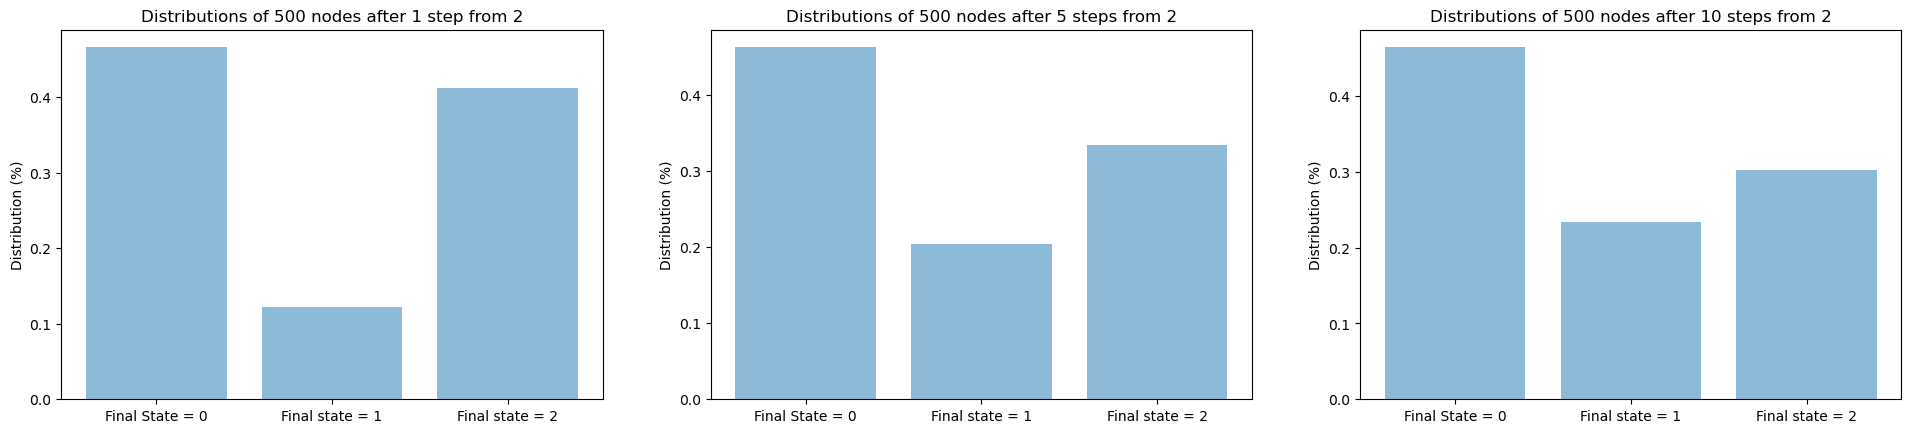

In [95]:
objects = ('Final State = 0', 'Final state = 1', 'Final state = 2')
y_pos_y = np.arange(len(objects))
performance_y = [len(y[y==0])/500, len(y[y==1])/500, len(y[y==2])/500]

performance_x = [len(x[x==0])/500, len(x[x==1])/500, len(x[x==2])/500]

performance_z = [len(z[z==0])/500, len(z[z==1])/500, len(z[z==2])/500]

fig, ax = plt.subplots(1,3)

plt.subplots_adjust(left=None, bottom=None, right=3, top=None, wspace=None, hspace=None)

ax[0].bar(y_pos, performance_y, align='center', alpha=0.5)
ax[0].set_xticks(y_pos, objects)
ax[0].set_ylabel('Distribution (%)')
ax[0].set_title('Distributions of 500 nodes after 1 step from 2')


ax[1].bar(y_pos, performance_x, align='center', alpha=0.5)
ax[1].set_xticks(y_pos, objects)
ax[1].set_ylabel('Distribution (%)')
ax[1].set_title('Distributions of 500 nodes after 5 steps from 2')



ax[2].bar(y_pos, performance_z, align='center', alpha=0.5)
ax[2].set_xticks(y_pos, objects)
ax[2].set_ylabel('Distribution (%)')
ax[2].set_title('Distributions of 500 nodes after 10 steps from 2')


plt.show()

The above graphs hint at a form of convergence of these probability distributions as n grows large. 

In fact, they exhibit the long term behaviour of markov chains with the mixing property, i.e. the probability distributions contained within $\rho$ of the state change from any state (state two in our case ) tends towards a constant distribution $\pi$. (We also know that our Markov chain is necessarily mixing as it is primitive.)

We can see this further if we examine the long term behaviour in $n$ of our transition matrix $P_{ij}^n$ 

In [105]:
#define transition matrix
Pij = np.array([[0.4,0.3,0.3], [0.5,0.3,0.2], [0.5,0.1,0.4]])
Pn = matrix_power(Pij, n)

for n in [1,5,10,20,50,100,1000]:
    print('Pij to the power ', n ,' is \n', matrix_power(Pij, n))

Pij to the power  1  is 
 [[0.4 0.3 0.3]
 [0.5 0.3 0.2]
 [0.5 0.1 0.4]]
Pij to the power  5  is 
 [[0.45454 0.23868 0.30678]
 [0.45455 0.23878 0.30667]
 [0.45455 0.23846 0.30699]]
Pij to the power  10  is 
 [[0.45454545 0.23863638 0.30681817]
 [0.45454545 0.23863641 0.30681813]
 [0.45454545 0.23863631 0.30681824]]
Pij to the power  20  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  50  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  100  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  1000  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]


If we take these numbers to be recurring, we get the following exact form for limit of the transition matrix $P^{\infty}$ :


\begin{pmatrix}
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\end{pmatrix}



Fortunately, $\frac{45}{99} + \frac{21}{88} + \frac{1022625}{3333000} = 1$ so we have a well defined transition matrix in the sense of probability distributions. 



In [114]:
print('1022625/3333000 + 45/99 + 21/88 =', 1022625/3333000 + 45/99 + 21/88)

1022625/3333000 + 45/99 + 21/88 = 1.0


This behaviour occurs because in an irreducible and aperiodic Markov chain (like we have here), the transition matrix will converge to a unique stationary distribution regardless of the initial state.

The stationary distribution represents an equilibrium point where the Markov chain reaches a balance, and the probabilities of being in each state no longer change. This helps us to understand the long term dynamics of the system. 